<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# web location:
web_csv = 'https://raw.githubusercontent.com/josephofiowa/GA-DSI/master/NHL_Data_GA.csv'
local_csv = './datasets/NHL_Data_GA.csv'

### 1. Load the NHL data

In [19]:
# A:
nhl = pd.DataFrame.from_csv(local_csv)
nhl.columns

Index([u'PTS', u'Rank', u'TOI', u'GF', u'GA', u'GF60', u'GA60', u'GF%', u'SF',
       u'SA', u'SF60', u'SA60', u'SF%', u'FF', u'FA', u'FF60', u'FA60', u'FF%',
       u'CF', u'CA', u'CF60', u'CA60', u'CF%', u'Sh%', u'Sv%', u'PDO', u'PIM'],
      dtype='object')

### 2. Perform any required data cleaning. Do some EDA.

In [7]:
# A:
#good to go

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [17]:
# A:
y=nhl.Rank
y.unique()
# there are 3 classes

array([1, 2, 3], dtype=int64)

### 4. What is the baseline accuracy?

In [18]:
# A:
y.value_counts()

3    31
2    30
1    29
Name: Rank, dtype: int64

### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [25]:
# A:
feature_cols = ['GF', 'GA', 'Sv%', 'PIM']
X = nhl[feature_cols]
X.head()

,GF,GA,Sv%,PIM
Team,,,,
Washington10,115,73,93.03,1269
Vancouver11,94,72,93.16,985
San Jose10,90,68,93.46,1195
Chicago10,104,83,90.44,966
Vancouver12,86,74,93.36,1049


### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [33]:
# A:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)


### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [34]:
# A:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
accuracy_score(y_test, y_pred_class)

0.52173913043478259

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [35]:
# A:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, train_size=.5)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
accuracy_score(y_test, y_pred_class)

0.59999999999999998

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [38]:
# A:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99, train_size=.5)

knn = KNeighborsClassifier(n_neighbors=len(X_train))
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
accuracy_score(y_test, y_pred_class)

0.31111111111111112

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

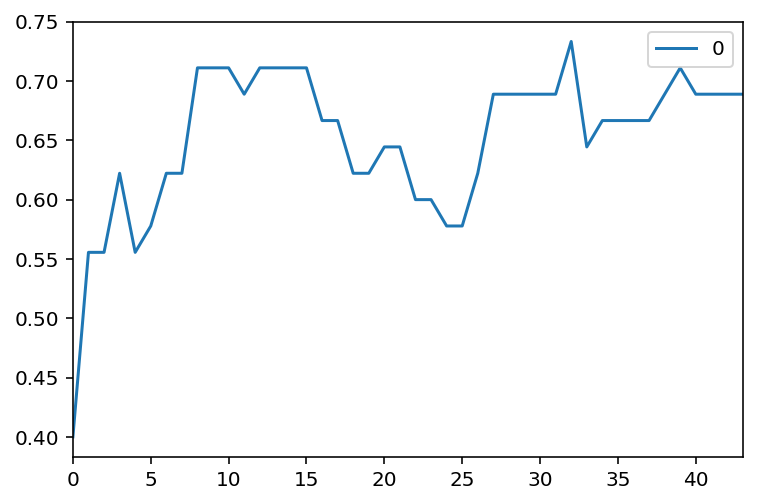

In [52]:
# A:
accuracy = []

for k in range(1, len(X_train)):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    accuracy.append(1-accuracy_score(y_test, y_pred_class))

df = pd.DataFrame(accuracy)
df.plot()
    

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [13]:
# A:

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [14]:
# A: